# This workbook will provide an in depth understanding of how Logistic regression works with the iris dataset
https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

# Import required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Loading dataset

#### We will focus our analysis on 2D datasets. This means that, instead of trying to predict flower classes by using all 4 features, we will analyse separately the sepal and petal information.

#### This is done for visualisation purposes which will enable us to better understand what the algorithm does when performing parameter tuning to it.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X1_sepal = iris.data[:,[0,1]] #がく
X2_petal = iris.data[:,[2,3]] #花弁
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)  

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Visualising the data

Text(0, 0.5, 'Petal width')

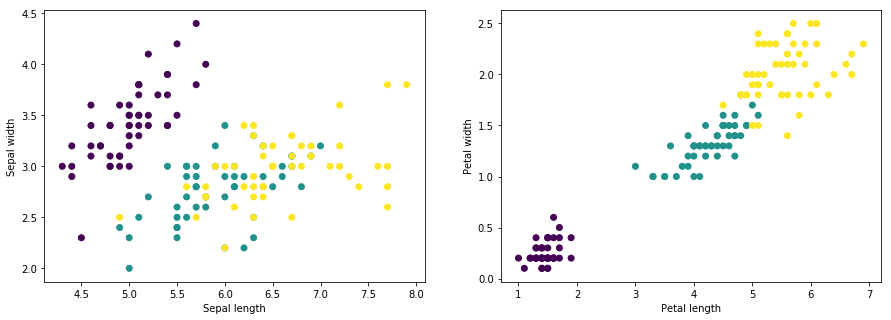

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y) #parameter c : color, sequence, or sequence of color, optional
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

#### Create function used to plot decision regions

# Splitting and scaling the dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
## SPLITTING


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal,y,test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal,y,test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

#####################################################################
## SCALING

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#####################################################################
## COMBINING FOR FUTURE PLOTTING

X_combined_sepal_standard = np.vstack((X_train_sepal_std,X_test_sepal_std))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std,X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


In [38]:
y_train_sepal

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# Testing different parameters to understand how accuracies change.

## Understanding how decision regions change when using different regularization values.

#### Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.

#### Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

#### Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

### 1. Testing sepal data with different regularization values.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve #https://scikit-learn.org/stable/modules/learning_curve.html

C_param_range = [0.001,0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

#### (参考)validation curveについて
https://axa.biopapyrus.jp/machine-learning/model-evaluation/validation-curve.html

In [7]:
sepal_acc_table

,C_parameter,Accuracy
0,0.001,NaN
1,0.010,NaN
2,0.100,NaN
3,1.000,NaN
4,10.000,NaN
5,100.000,NaN


In [8]:
from matplotlib.colors import ListedColormap

# 描画に使う関数の定義
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

inside the function

In [9]:
X = X_combined_sepal_standard
resolution=0.02

x1_min = X[:,0].min() - 1
x1_max = X[:,0].max() + 1
x2_min = X[:,1].min() - 1
x2_max = X[:,1].max() + 1

In [10]:
xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))

In [12]:
lr = LogisticRegression(penalty = 'l2', C = 0.1, random_state = 0)
lr.fit(X_train_sepal_std,y_train_sepal)
classifier = lr

Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
xx1.ravel()

array([-2.82578828, -2.80578828, -2.78578828, ...,  3.25421172,
        3.27421172,  3.29421172])

In [17]:
len(Z)

114818

In [16]:
xx1.shape

(374, 307)

In [18]:
Z = Z.reshape(xx1.shape)

In [19]:
# Initialise the marker types and colors
markers = ('s','x','o','^','v')
colors = ('red','blue','lightgreen','gray','cyan')
color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data

(-3.3784626758700163, 4.0815373241299895)

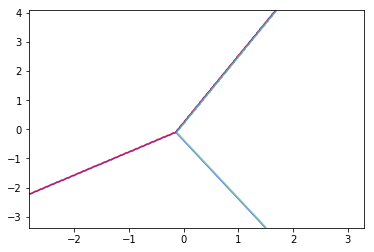

In [29]:
plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

In [30]:
y = Y_combined_sepal

In [31]:
test_idx = range(105,150)
X_test, Y_test = X[test_idx,:], y[test_idx]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


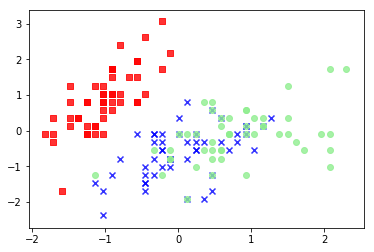

In [34]:
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                alpha = 0.8, c = color_Map(idx),
                marker = markers[idx], label = cl)

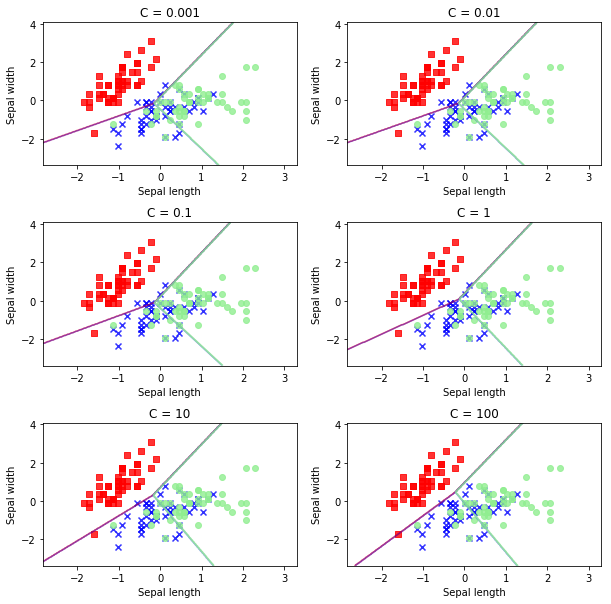

In [10]:
plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = lr.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4) #プロット間の幅(高さ)を調整する https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = lr
                      , test_idx = range(105,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)

### Comments on sepal model:

#### As you can observe, there are very slight differences between the decision regions for this dataset. As logistic regression is linear, this algorithm can't change much the classification model as the data is not linearly separated.

### 2. Testing petal data with different regularization values.

/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row 

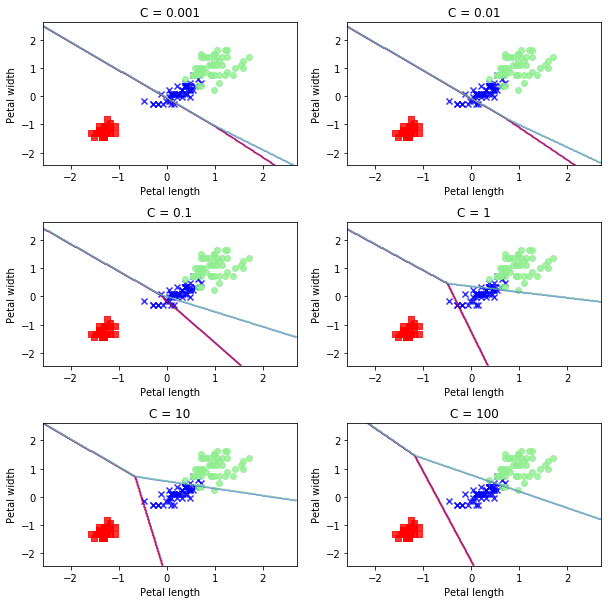

In [40]:
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = lr.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = lr
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('C = %s'%i)

### Comments of petal

#### Here, the effect of using different regularization values is quite obvious. As we mentioned before, small C values will increase the regularization strenght which implies the creation of simple models that tend to underfit the data. By using bigger C values, the model can increase it's complexity and adjust better to the data.

## Understanding which C parameters are the best to use.

#### A valid question to raise is, which C values must we then use? 

#### There is a way to check which C values are best. The idea is to understand how each C value affects the accuracy of the training set and the testing set. Remember that our goal is always to create a model that can generalise to unseen data.

#### The way to do this is to plot validation curves.

### Use of validation curves for both datasets.

/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/ikumi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

(0.5, 1)

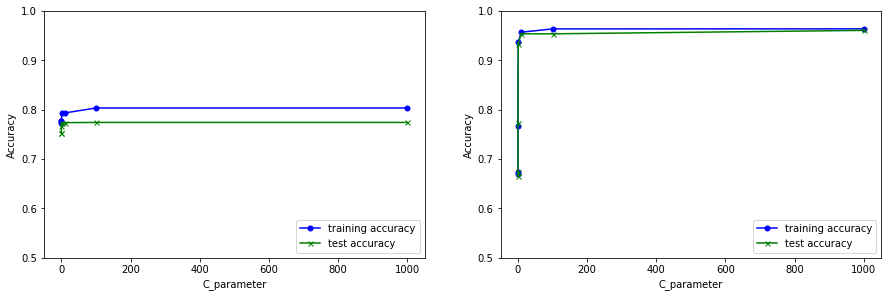

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
### 1. Use of validation curves for both datasets.
C_param_range = [0.001,0.01,0.1,1,10,100,1000]

plt.figure(figsize=(15, 10))

# Apply logistic regression model to training data
lr = LogisticRegression(penalty='l2',C = i,random_state = 0)

# SEPAL Plot validation curve
train_sepal_scores, test_sepal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_sepal_standard
                                                            ,y=Y_combined_sepal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )

train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std = np.std(train_sepal_scores,axis=1)
test_sepal_mean = np.mean(test_sepal_scores,axis=1)
test_sepal_std = np.std(test_sepal_scores,axis=1)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])



# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_petal_standard
                                                            ,y=Y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

### Comment on validation curves:

#### 1. As we saw for the validation curves, the sepal dataset has much lower accuracy than the petal one. 
#### 2. The petal dataset keeps increasing its training accuracy if you let the model be as complex as it likes.

### So, which C do we use?

#### You might have guessed it, but the idea is to choose that C which offers the smallest difference between the training and testing accuracy (remember we want to generalise our model to unseen data).